# Dimension Reduction

In [1]:
import pandas as pd
import numpy as np

# Principal components analysis (PCA) 

* It is a useful method for dimension reduction, especially when the number of variables is large.
* PCA is intended for use with numerical variables. 
   * For categorical variables, other methods such as correspondence analysis are more suitable. 

In [2]:
Path = 'C:\\Users\\npradah\\Documents\\Team30_ArtificialmenteInteligentes\\Semana 4\\default of credit card clients.csv'

In [3]:
credit_df = pd.read_csv(Path, index_col = 0)
credit_df.rename(columns = {'X1' : 'credit', 'X2': 'gender', 'X3': 'education', 'X4': 'marital', 'X5': 'age',
                      'X6' : 'hpp Sep 2005', 'X7' : 'hpp Aug 2005', 'X8' : 'hpp Jul 2005', 'X9' : 'hpp Jun 2005', 'X10' : 'hpp May 2005', 'X11' : 'hpp Apr 2005', 
                      'X12' : 'abs Sep 2005', 'X13' : 'abs Aug 2005', 'X14' : 'abs Jul 2005', 'X15' : 'abs Jun 2005', 'X16' : 'abs May 2005', 'X17' : 'abs Apr 2005', 
                      'X18' : 'app Sep 2005', 'X19' : 'app Aug 2005', 'X20' : 'app Jul 2005', 'X21' : 'app Jun 2005', 'X22' : 'app May 2005', 'X23' : 'app Apr 2005', 
                            'Y':'Y credibility'}, inplace = True)



df = credit_df.copy()

credit_df = credit_df.drop(['gender','education','marital','Y credibility'],axis=1)
df

,credit,gender,education,marital,age,hpp Sep 2005,hpp Aug 2005,hpp Jul 2005,hpp Jun 2005,hpp May 2005,...,abs Jun 2005,abs May 2005,abs Apr 2005,app Sep 2005,app Aug 2005,app Jul 2005,app Jun 2005,app May 2005,app Apr 2005,Y credibility
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [4]:
df.shape

(30000, 24)

In [5]:
df_pca = df.drop(['gender','education','marital','Y credibility'],axis=1)
df_pca.shape

(30000, 20)

For each client, the data include 20 numerical variables, and we are interested in reducing this dimension.

Principal Component Analysis can tell you what variables in your data are the most important. 

In [6]:
df.dropna(axis = 0, inplace = True) # axis 1 is columns / axis 0 is rows. dat
df

,credit,gender,education,marital,age,hpp Sep 2005,hpp Aug 2005,hpp Jul 2005,hpp Jun 2005,hpp May 2005,...,abs Jun 2005,abs May 2005,abs Apr 2005,app Sep 2005,app Aug 2005,app Jul 2005,app Jun 2005,app May 2005,app Apr 2005,Y credibility
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


We focus first on two variables: `credit` and consumer `age`: 

In [7]:
ndf = df[['credit', 'age']]
ndf.corr()

,credit,age
credit,1.000000,0.144515
age,0.144515,1.000000


In [8]:
round(df.credit.mean(),2)

167555.9

In [9]:
round(df.age.mean(),2)


35.48

In [10]:
Varience = np.cov([df.credit, df.age])
Varience

array([[1.68317668e+10, 1.72759143e+05],
       [1.72759143e+05, 8.49036715e+01]])

In [11]:
ndf = df[['credit','age']]
ndf.var().sum()

16831766859.49057

In [12]:
t= ndf.var().sum()
varM =Varience[0][0]
varA = Varience[1][1]

In [13]:
print('Total Varience \t\t\t:', t.round(2) )
print('Varience prop. of credit \t:', ((varM/t)*100).round(2),'%' )
print('Varience prop. of age \t:', ((varA/t)*100).round(2),'%' )

Total Varience 			: 16831766859.49
Varience prop. of credit 	: 100.0 %
Varience prop. of age 	: 0.0 %


If we drop `age` for the sake of dimension reduction, we lose at least 0% of the total variability. 

In [14]:
ndf.corr().round(2)

,credit,age
credit,1.00,0.14
age,0.14,1.00


Roughly speaking, 14% of the total variation in both variables is actually “co-variation,” or variation in one variable that is duplicated by similar variation in the other variable. 

Can we use this fact to reduce the number of variables, while making maximum use of their unique contributions to the overall variation? 

Since there is redundancy in the information that the two variables contain, it might be possible to reduce the `two variables` to a `single variable` `without losing` `too much` information. 

The idea in PCA is to find a linear combination of the two variables that contains most, even if not all, of the information, so that this new variable can replace the two original variables.  

The line `z1 (first principal component = PC1)` is the direction in which the variability of the points is largest. 

The `z2 (second principal component = PC2)`-axis is chosen to be perpendicular to the z1-axis.  

In [15]:
import seaborn as sns

<AxesSubplot:xlabel='credit', ylabel='age'>

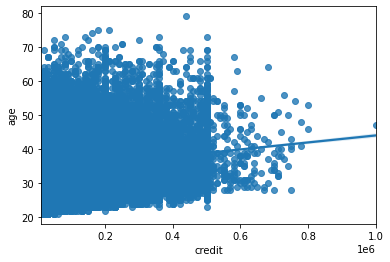

In [16]:
p = sns.regplot(data = df,  
                x = df.credit, 
                y = df.age
               ) 

p

In [17]:
import numpy as np
from sklearn.decomposition import PCA

In [18]:
pcs = PCA(n_components=2)

pcs.fit(df[['credit', 'age']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,129737.299095,1.000000e+00,1.0
1,9.117593,4.938905e-09,1.0


In [19]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1
Standard deviation,129737.3,9.12
Proportion of variance,1.0,0.00
Cumulative proportion,1.0,1.00


In [20]:
pcsSummary.columns = ['PC1', 'PC2']
pcsSummary = pcsSummary.round(4)
pcsSummary

,PC1,PC2
Standard deviation,129737.2991,9.1176
Proportion of variance,1.0000,0.0000
Cumulative proportion,1.0000,1.0000


The summary gives the reallocated variance: 
* `z1` accounts for 100% of the total variability and 
* `z2` for the remaining 0%. 

Therefore, if we drop `z2 = PC2`, we still maintain 100% of the total variability. 

https://www.youtube.com/watch?v=FgakZw6K1QQ 

### Scree Plot

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt

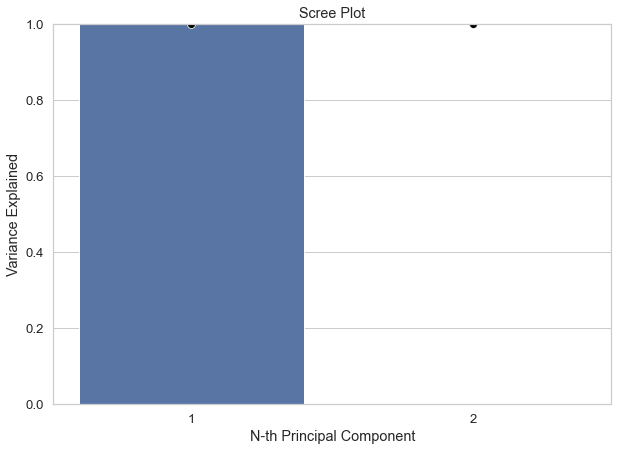

In [22]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

* The first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible)
* Each succeeding component, in turn, has the highest variance possible under the constraint that it is orthogonal the preceding components.

In [23]:
pcs.components_.round(4) #is the set of all eigenvectors for your projection space (one eigenvector for each principal component).

array([[ 1.,  0.],
       [-0.,  1.]])

In [24]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=['PC1', 'PC2'],
                                index=['credit', 'age']
                                )
pcsComponents_df

,PC1,PC2
credit,1.00000,-0.00001
age,0.00001,1.00000


> The first column here shows coefficients of linear combination that defines PC1 (z1)

> The second column shows coefficients for PC2 (z2).

# The weights are used to compute principal component scores, which are the projected values of credit and age onto the new axes (after subtracting the means). 

* The average credit across the 29958 clients is `167555.9` and the average consumer age is `35.48`.

* The first column is the projection onto z1 using the weights (1, 0.00001). 

    * The second column is the projection onto z2 using the weights (-0.00001, 1). 
    
For example:  

First, we need to center the original variables by subtracting column means
(20000 − `167555.9`)   & (24 − `35.48`)

Second multiply them with corresponding Principal components. 

The first score for the 100% Bran cereal (with 20000 credit and a age of 24) is 
$$( 1)(20000 − 167555.9) + (0.00001)(24 − 35.48) = -147555.9$$
$$ Z_i = a_{i1} (X_1 - \bar{X_1}) + a_{i2} (X_2 - \bar{X_2}) + \cdots + a_{in} (X_n - \bar{X_n}) ; i = 1, 2, 3, \cdots n$$

In [25]:
scores = pd.DataFrame(pcs.transform(df[['credit', 'age']]),
                      columns=['x', 'y']
                      )
scores.head()

,x,y
0,-147555.901038,-9.968948
1,-47555.901023,-8.995336
2,-77555.900939,-0.687419
3,-117555.900906,2.723136
4,-117555.900701,22.723136


In [26]:
x = (1)*(20000-167555.9)+(0.00001)*(24-35.48)

y = (-0.00001)*(20000-167555.9)+(1.0000)*(24-35.48)

In [27]:
print('For the PC1\n \t x = ', x, '\n\t y = ', y)

For the PC1
 	 x =  -147555.9001148 
	 y =  -10.004440999999996


In [28]:
scores.x.mean()

-1.2068792501635717e-11

In [29]:
scores.y.sum()

-6.230038707144558e-11

The sum of the variances `var(z1) + var(z2)` is equal to the sum of the variances of the original variables, `var(credit) + var(age)`.  

In [30]:
scores.x.var() + scores.y.var()

16831766859.488016

In [31]:
df.credit.var() + df.age.var()

16831766859.490568

In [32]:
round(((scores.x.var()/
  (scores.x.var()+scores.y.var())
 )*100),0)

100.0

In [33]:
pcs = PCA()
pcs.fit(credit_df.iloc[:, 3:].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Standard deviation,155841.858701,37338.073642,27844.166817,21440.998639,20314.589407,18522.679643,17040.035861,16327.241339,11623.458479,10435.755871,8786.471848,8201.498865,2.144480e+00,8.488960e-01,6.173954e-01,5.185782e-01,4.190132e-01
Proportion of variance,0.848680,0.048717,0.027092,0.016064,0.014421,0.011989,0.010147,0.009315,0.004721,0.003806,0.002698,0.002351,1.607014e-10,2.518167e-11,1.331994e-11,9.397323e-12,6.135232e-12
Cumulative proportion,0.848680,0.897397,0.924489,0.940553,0.954974,0.966963,0.977110,0.986425,0.991146,0.994952,0.997649,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Scree Plot

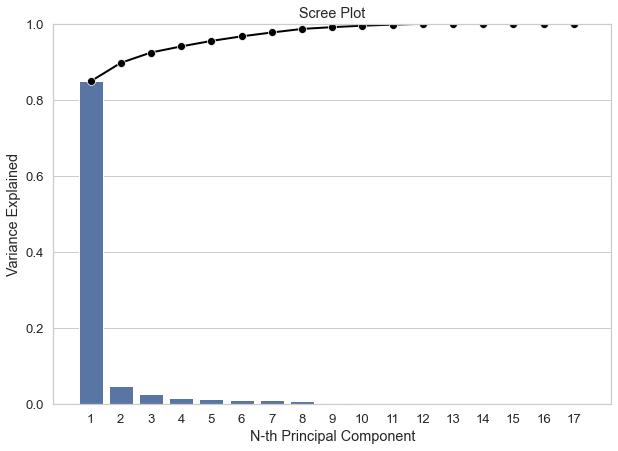

In [34]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()


Note that the first three components account for more than 92% of the total variation associated with all 24 of the original variables.

In [35]:
#pcsSummary_df.iloc[1][0]+pcsSummary_df.iloc[1][1]+pcsSummary_df.iloc[1][2]
#OR
((pcsSummary_df.iloc[2][2])*100).round(0)
#type(pcsSummary_df)

92.0

In fact, the first two principal components alone capture 89.74% of the total variation.

In [36]:
#pcsSummary_df.iloc[1][0]+pcsSummary_df.iloc[1][1]
#OR
((pcsSummary_df.iloc[2][1])*100).round(2)

89.74

In [37]:
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Standard deviation,155841.8587,37338.0736,27844.1668,21440.9986,20314.5894,18522.6796,17040.0359,16327.2413,11623.4585,10435.7559,8786.4718,8201.4989,2.1445,0.8489,0.6174,0.5186,0.419
Proportion of variance,0.8487,0.0487,0.0271,0.0161,0.0144,0.0120,0.0101,0.0093,0.0047,0.0038,0.0027,0.0024,0.0000,0.0000,0.0000,0.0000,0.000
Cumulative proportion,0.8487,0.8974,0.9245,0.9406,0.9550,0.9670,0.9771,0.9864,0.9911,0.9950,0.9976,1.0000,1.0000,1.0000,1.0000,1.0000,1.000


In [38]:
pcs.components_

array([[ 1.81982545e-06,  1.80128215e-06,  1.81900124e-06,
         1.85079913e-06,  1.91465813e-06,  4.46555462e-01,
         4.40877070e-01,  4.29192025e-01,  3.97480521e-01,
         3.69459826e-01,  3.52644584e-01,  2.49822873e-02,
         2.84025166e-02,  2.38452205e-02,  1.93468667e-02,
         1.90038654e-02,  2.06262868e-02],
       [-1.49975730e-06, -3.84326703e-07,  1.25822191e-06,
         2.66369448e-06,  3.67300317e-06, -5.48935385e-01,
        -3.93843775e-01, -5.02997215e-02,  2.57543542e-01,
         4.24101453e-01,  4.79661871e-01,  4.36479153e-02,
         1.69387922e-01,  1.41916930e-01,  1.00113321e-01,
         6.20413985e-02, -1.22921559e-02],
       [-4.19703573e-06, -3.31806408e-06, -1.27930012e-06,
        -2.27079169e-06, -3.57919631e-06, -1.90177646e-01,
        -3.57746150e-02,  5.38449125e-01,  6.85906494e-02,
        -2.06058063e-01, -3.11922694e-01,  2.04310335e-01,
         6.80297620e-01,  4.46764329e-02, -2.52282281e-02,
         2.77548402e-02,  1.4

In [39]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = credit_df.iloc[:, 3:].columns
                                )
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
hpp Aug 2005,0.000002,-1.499757e-06,-0.000004,-0.000008,2.305597e-06
hpp Jul 2005,0.000002,-3.843267e-07,-0.000003,-0.000009,8.172153e-07
hpp Jun 2005,0.000002,1.258222e-06,-0.000001,-0.000010,2.001431e-06
hpp May 2005,0.000002,2.663694e-06,-0.000002,-0.000009,-1.241451e-06
hpp Apr 2005,0.000002,3.673003e-06,-0.000004,-0.000007,8.528811e-07
abs Sep 2005,0.446555,-5.489354e-01,-0.190178,0.313628,7.877403e-02
abs Aug 2005,0.440877,-3.938438e-01,-0.035775,0.028667,-7.562369e-02
abs Jul 2005,0.429192,-5.029972e-02,0.538449,-0.333122,2.297394e-01
abs Jun 2005,0.397481,2.575435e-01,0.068591,-0.247256,-5.475081e-01
abs May 2005,0.369460,4.241015e-01,-0.206058,-0.003571,-7.859423e-02


In [40]:
pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = credit_df.iloc[:, 3:].columns
                                )
pcsComponents_dfX

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
hpp Aug 2005,0.000002,-1.499757e-06,-0.000004,-0.000008,2.305597e-06,-2.736507e-06,8.258552e-07,-5.841227e-07,0.000003,5.534762e-06,3.017595e-06,1.689199e-06,0.435163,-6.259274e-01,-5.357077e-01,-3.521767e-01,8.852824e-02
hpp Jul 2005,0.000002,-3.843267e-07,-0.000003,-0.000009,8.172153e-07,3.533128e-06,2.675085e-07,-5.013228e-07,0.000002,4.256297e-06,1.814341e-07,1.321154e-06,0.467994,-3.973749e-01,3.781375e-01,6.470125e-01,-2.479146e-01
hpp Jun 2005,0.000002,1.258222e-06,-0.000001,-0.000010,2.001431e-06,7.634436e-07,1.377877e-06,-1.468513e-06,0.000004,8.130098e-07,1.920327e-06,3.355409e-06,0.467133,1.289582e-01,5.722755e-01,-3.877621e-01,5.360017e-01
hpp May 2005,0.000002,2.663694e-06,-0.000002,-0.000009,-1.241451e-06,-9.055027e-07,-5.618409e-07,-6.693577e-07,0.000005,2.962751e-06,4.756611e-07,-7.456051e-07,0.443261,4.064673e-01,-9.173617e-03,-3.422169e-01,-7.218780e-01
hpp Apr 2005,0.000002,3.673003e-06,-0.000004,-0.000007,8.528811e-07,2.829327e-09,3.291314e-06,1.266949e-06,0.000005,4.302464e-06,-1.078469e-06,2.551500e-06,0.420621,5.181334e-01,-4.923879e-01,4.357460e-01,3.497076e-01
abs Sep 2005,0.446555,-5.489354e-01,-0.190178,0.313628,7.877403e-02,-4.581596e-01,8.312471e-03,7.776721e-02,0.171049,-2.671135e-01,-2.046138e-01,-4.596279e-03,0.000005,1.106762e-06,1.683263e-06,1.301693e-06,-2.308267e-07
abs Aug 2005,0.440877,-3.938438e-01,-0.035775,0.028667,-7.562369e-02,5.263058e-01,-6.475534e-02,1.034436e-01,0.012323,3.512461e-01,4.764986e-01,1.502152e-02,-0.000004,3.016674e-06,-5.936578e-07,-1.038195e-06,2.964557e-07
abs Jul 2005,0.429192,-5.029972e-02,0.538449,-0.333122,2.297394e-01,3.110302e-02,7.947392e-02,-1.176714e-01,-0.336088,1.534884e-01,-4.415856e-01,-8.333317e-02,-0.000002,3.692032e-07,-1.481407e-06,-7.145710e-07,-3.111520e-07
abs Jun 2005,0.397481,2.575435e-01,0.068591,-0.247256,-5.475081e-01,-1.774123e-01,-2.289582e-01,-1.017887e-01,-0.141102,-3.723193e-01,2.331606e-01,3.208149e-01,-0.000002,-1.355848e-06,-1.605450e-06,1.707607e-06,3.155215e-07
abs May 2005,0.369460,4.241015e-01,-0.206058,-0.003571,-7.859423e-02,-1.412275e-02,4.807684e-01,1.246849e-01,0.099148,-5.629411e-02,9.284986e-02,-6.053786e-01,-0.000003,-2.618674e-06,1.546964e-06,-4.230649e-07,8.685242e-07


Here, it is clear that: 
* the first principal component is dominated by the 'abs Sep 2005': 
  * it has the highest (in this case, negative) weight (0.446555). 
  	
  * This means that the first principal component is in fact measuring how much 'abs Sep 2005' Amount of bill statement (NT dollar) has the client.
  
* The second principal component seems to be measuring 'app Aug 2005'. 

**Normalize before applying PCA!!!**

* Normalize and then performing PCA on the correlation matrix instead of the covariance matrix. 
* Using the correlation matrix means that you are opeage on the normalized data. 

In [41]:
from sklearn import preprocessing

#### Normalize the 24 variables due to the different scales of the variables and then perform PCA (or equivalently, we use PCA applied to the correlation matrix)

In [42]:
credit_df.iloc[:, 3:].head()

,hpp Aug 2005,hpp Jul 2005,hpp Jun 2005,hpp May 2005,hpp Apr 2005,abs Sep 2005,abs Aug 2005,abs Jul 2005,abs Jun 2005,abs May 2005,abs Apr 2005,app Sep 2005,app Aug 2005,app Jul 2005,app Jun 2005,app May 2005,app Apr 2005
ID,,,,,,,,,,,,,,,,,
1,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [43]:
pcs = PCA()
pcs.fit(preprocessing.scale(credit_df.iloc[:, 3:].dropna(axis=0))) 
                # Standardize a dataset along any axis.
                # Center to the mean and component wise scale to unit variance.


PCA()

In [44]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Standard deviation,2.5219,1.8419,1.2268,0.9550,0.9424,0.9339,0.8848,0.8558,0.7361,0.5261,0.5006,0.4404,0.3638,0.2650,0.2023,0.1591,0.1524
Proportion of variance,0.3741,0.1996,0.0885,0.0537,0.0522,0.0513,0.0461,0.0431,0.0319,0.0163,0.0147,0.0114,0.0078,0.0041,0.0024,0.0015,0.0014
Cumulative proportion,0.3741,0.5737,0.6622,0.7158,0.7681,0.8194,0.8654,0.9085,0.9404,0.9567,0.9714,0.9828,0.9906,0.9947,0.9971,0.9986,1.0000


In [60]:
pcsSummary_df.iloc[2,1]

0.5736611523101947

* Now we find that we need eleven principal components to account for 97% of the total variability. 
* The first two principal components account for only 57.366% of the total variability, and thus reducing the number of variables to two would mean losing a lot of information. 

In [46]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=credit_df.iloc[:, 3:].columns
                                )
pcsComponents_df.iloc[:,:12]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
hpp Aug 2005,0.182133,-0.370555,0.038277,-0.093717,0.003960,-0.024331,0.005363,0.009595,0.615737,0.521661,-0.038415,-0.390193
hpp Jul 2005,0.190795,-0.396060,0.091279,-0.050900,-0.022859,-0.019187,-0.025106,-0.109569,0.402112,-0.303752,-0.163334,0.640234
hpp Jun 2005,0.198663,-0.405322,0.126948,-0.014929,-0.041633,0.021928,-0.056389,0.005734,-0.083813,-0.600528,0.041285,-0.287605
hpp May 2005,0.203603,-0.394029,0.145679,0.032480,-0.008026,0.026185,0.068537,0.030625,-0.375459,-0.040259,0.143001,-0.380931
hpp Apr 2005,0.200126,-0.364357,0.144839,0.048810,0.080890,-0.025331,0.016044,0.046116,-0.491732,0.504451,0.085245,0.430590
abs Sep 2005,0.343788,0.138461,-0.220410,-0.050892,-0.030255,-0.059413,0.011303,0.008644,0.087699,-0.006283,0.551036,0.056687
abs Aug 2005,0.355785,0.138389,-0.189278,0.016305,-0.078714,-0.045989,-0.036404,-0.134339,0.057511,-0.011580,0.370383,0.055778
abs Jul 2005,0.360308,0.143952,-0.126089,0.050449,-0.137722,0.076274,-0.121489,0.099198,0.025127,-0.027979,0.108879,0.041469
abs Jun 2005,0.364520,0.140552,-0.114611,0.086367,-0.032131,0.022430,0.125392,0.035091,-0.032335,-0.033458,-0.205666,-0.043450
abs May 2005,0.362235,0.138095,-0.096712,0.060789,0.126729,-0.064318,-0.004393,0.049924,-0.076136,0.008609,-0.412448,-0.060730


In [47]:
pcsComponents_df.PC1.idxmax()

'abs Jun 2005'

In [48]:
pcsComponents_df.PC1.nlargest(3)

abs Jun 2005    0.364520
abs May 2005    0.362235
abs Jul 2005    0.360308
Name: PC1, dtype: float64

In [49]:
pcsComponents_df.PC1.idxmin()

'app Apr 2005'

In [50]:
pcsComponents_df.PC1.nsmallest(3)

app Apr 2005    0.074396
app May 2005    0.080258
app Jun 2005    0.083278
Name: PC1, dtype: float64

***'abs Jun 2005'***

In [51]:
pcsComponents_df.PC2.idxmax()

'app Jul 2005'

In [52]:
pcsComponents_df.PC2.nlargest(3)

app Jul 2005    0.162770
app Sep 2005    0.159187
app Aug 2005    0.151848
Name: PC2, dtype: float64

In [53]:
pcsComponents_df.PC2.idxmin()

'hpp Jun 2005'

In [54]:
pcsComponents_df.PC2.nsmallest(3)

hpp Jun 2005   -0.405322
hpp Jul 2005   -0.396060
hpp May 2005   -0.394029
Name: PC2, dtype: float64

***'hpp Jun 2005'***

In [55]:
pcsComponents_df.PC3.idxmax()

'app Aug 2005'

In [56]:
pcsComponents_df.PC3.nlargest(3)

app Aug 2005    0.444283
app Sep 2005    0.407902
app Jul 2005    0.403362
Name: PC3, dtype: float64

In [57]:
pcsComponents_df.PC3.idxmin()

'abs Sep 2005'

In [58]:
pcsComponents_df.PC3.nsmallest(3)

abs Sep 2005   -0.220410
abs Aug 2005   -0.189278
abs Jul 2005   -0.126089
Name: PC3, dtype: float64

***'app Aug 2005'***

In [59]:
print('*'*55,'End','*'*55)

******************************************************* End *******************************************************
